# 🧠 Boston Housing Price Prediction with Keras

### 🔹 Step 1: Import Required Libraries

In [1]:
# Data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# TensorFlow Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

### 🔹 Step 2: Load and View the Dataset

In [2]:
df = pd.read_csv("datasets/boston_housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 🔹 Step 3: Split Features and Target

In [3]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

### 🔹 Step 4: Scale the Features

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 🔹 Step 5: Split into Training and Testing Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### 🔹 Step 6: Build the Neural Network Model

In [6]:
model = Sequential([
    # Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

### 🔹 Step 7: Compile the Model

In [7]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

### 🔹 Step 8: Train the Model

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.1,
    # verbose=1
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 584.9959 - mae: 22.2680 - val_loss: 551.4127 - val_mae: 21.8904
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 551.4524 - mae: 21.5654 - val_loss: 508.4483 - val_mae: 20.9307
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 523.6242 - mae: 20.7737 - val_loss: 456.1631 - val_mae: 19.7106
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 458.4932 - mae: 19.3758 - val_loss: 389.9473 - val_mae: 18.0465
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 368.4524 - mae: 16.9566 - val_loss: 308.9883 - val_mae: 15.9300
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 321.7922 - mae: 15.3356 - val_loss: 222.1219 - val_mae: 13.2686
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 213.3084 - mae: 12.2211 - val_loss: 145.2480 - val_mae: 10.3197
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 141.1498 - mae: 9.6137 - val_loss: 89.8195 - val_mae: 7.5896
Epoch 9/50
12/12 ━━━━━━━━━

### 🔹 Step 9: Predict on Test Set

In [9]:
y_pred = model.predict(X_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


### 🔹 Step 10: Evaluate Model Performance

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"R2   : {r2:.2f}")

MAE  : 2.52
MSE  : 15.24
R2   : 0.79


### 🔹 Step 11: Show Predictions vs Actual

In [11]:
print("Predicted Price vs Actual Price (First 5 Samples)")
for i in range(5):
    print(f"Predicted: {y_pred[i]:.2f} || Actual: {y_test.iloc[i]:.2f}")

Predicted Price vs Actual Price (First 5 Samples)
Predicted: 27.61 || Actual: 23.60
Predicted: 32.85 || Actual: 32.40
Predicted: 20.51 || Actual: 13.60
Predicted: 27.21 || Actual: 22.80
Predicted: 16.59 || Actual: 16.10


### 🔹 Step 12: Predict from User Input

In [12]:
def predict_from_user_input():
    print("-- Enter feature values to predict the house price --")
    
    feature_names = X.columns
    user_input = {}
    
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        user_input[feature] = value

    user_df = pd.DataFrame([user_input])
    user_scaled = scaler.transform(user_df)
    
    pred = model.predict(user_scaled)
    print(f"\nPredicted Price: ${pred[0][0]*1000:.2f}")

# Uncomment to use
# predict_from_user_input()

### 🔹 Step 13: Plot Actual vs Predicted Prices

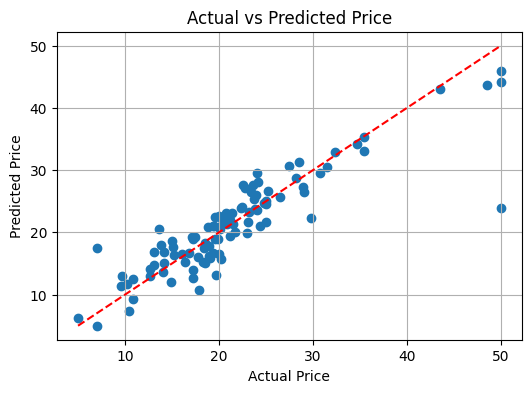

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

### 🔹 Step 14: Plot Loss Curve

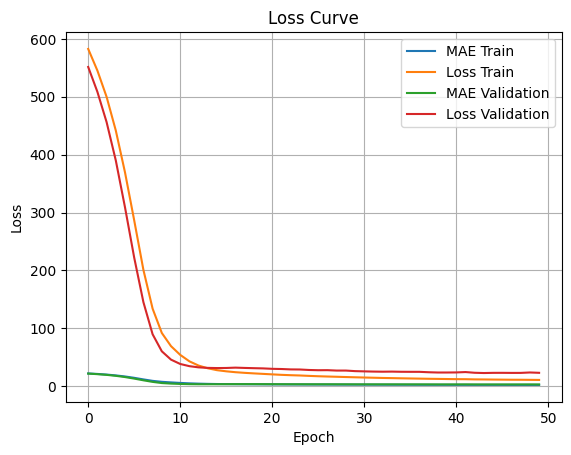

In [20]:
plt.plot(history.history['mae'], label='MAE Train')
plt.plot(history.history['loss'], label='Loss Train')
plt.plot(history.history['val_mae'], label='MAE Validation')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### 🔹 Step 15: Distribution of House Prices

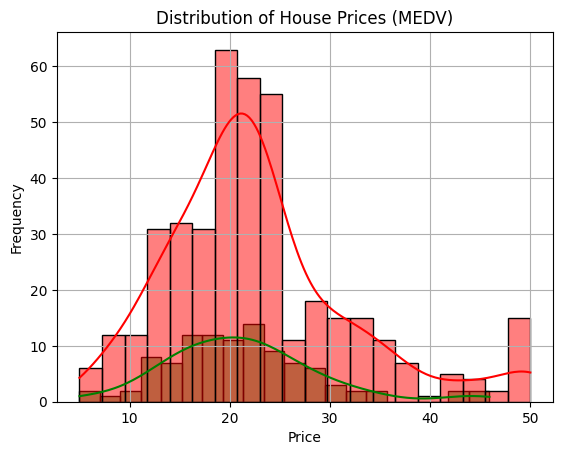

In [23]:
sns.histplot(y_pred, bins=20, kde=True, color='green')
sns.histplot(y_train, bins=20, kde=True, color='red')
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### 🔹 Step 16: Correlation Heatmap of Features

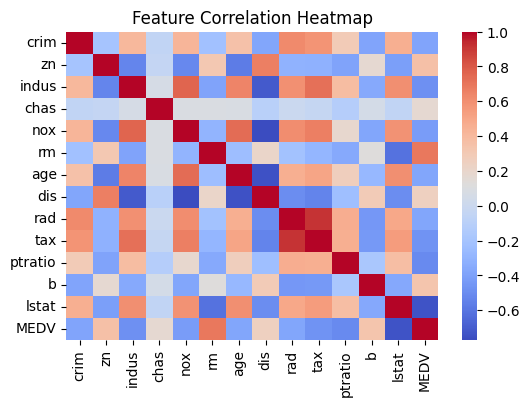

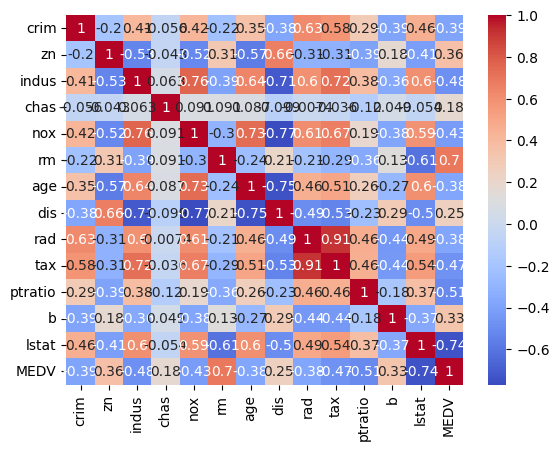

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)